In [93]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tmdbsimple as tmdb
import requests
import pandas as pd
import time
import numpy as np
from ast import literal_eval
from collections import Counter
sns.set_context('poster')
sns.set_style('ticks')


#### Genre Labels

In [81]:
key = open('key.txt','r').read()
payload = '{}'
url = "https://api.themoviedb.org/3/genre/movie/list?api_key={0}&language=en-US&page={1}".format(key, str(1))
response = requests.request("GET", url, data=payload).json()

genreDict = dict(zip([i['id'] for i in response['genres']],
                     [i['name'] for i in response['genres']]))
genreDict

{12: 'Adventure',
 14: 'Fantasy',
 16: 'Animation',
 18: 'Drama',
 27: 'Horror',
 28: 'Action',
 35: 'Comedy',
 36: 'History',
 37: 'Western',
 53: 'Thriller',
 80: 'Crime',
 99: 'Documentary',
 878: 'Science Fiction',
 9648: 'Mystery',
 10402: 'Music',
 10749: 'Romance',
 10751: 'Family',
 10752: 'War',
 10770: 'TV Movie'}

#### Start of EDA

In [103]:
movies = pd.read_csv('Data/movie_df.csv', encoding='utf8', converters={'genre_ids':literal_eval})
movies.release_date = pd.to_datetime(movies.release_date)
movies.head(20)

,genre_ids,id,overview,popularity,release_date,title,vote_average,vote_count
0,"[18, 80]",278,Framed in the 1940s for the double murder of h...,28.527767,1994-09-23,The Shawshank Redemption,8.5,9773
1,"[18, 80]",238,"Spanning the years 1945 to 1955, a chronicle o...",36.965452,1972-03-14,The Godfather,8.5,7394
2,"[18, 36, 10752]",424,The true story of how businessman Oskar Schind...,19.945455,1993-11-29,Schindler's List,8.4,5518
3,"[18, 80]",240,In the continuing saga of the Corleone crime f...,30.191804,1974-12-20,The Godfather: Part II,8.4,4249
4,"[18, 9648]",452522,Standalone version of the series pilot with an...,5.969249,1989-12-31,Twin Peaks,8.4,123
5,[18],244786,"Under the direction of a ruthless instructor, ...",29.936676,2014-10-10,Whiplash,8.3,5544
6,"[12, 878, 28]",333339,When the creator of a popular video game syste...,81.290391,2018-03-28,Ready Player One,8.3,137
7,"[53, 80]",680,"A burger-loving hit man, his philosophical par...",39.232028,1994-09-10,Pulp Fiction,8.3,10794
8,"[18, 878]",282848,"Orbiting a quiet backwater planet, the massed ...",5.976601,2013-12-25,Doctor Who: The Time of the Doctor,8.3,112
9,[18],550,A ticking-time-bomb insomniac and a slippery s...,42.100189,1999-10-15,Fight Club,8.3,11878


In [55]:
movies.overview[6]

'When the creator of a popular video game system dies, a virtual contest is created to compete for his fortune.'

In [56]:
movies.describe()

,id,popularity,vote_average,vote_count
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,69250.750250,16.961788,7.534066,1835.952048
std,120417.652116,19.316284,0.288459,2497.138811
min,11.000000,1.340784,7.200000,100.000000
25%,872.000000,7.666765,7.300000,270.000000
50%,10400.000000,10.351264,7.500000,727.000000
75%,59436.000000,21.569239,7.700000,2287.000000
max,455661.000000,341.104188,8.500000,16669.000000


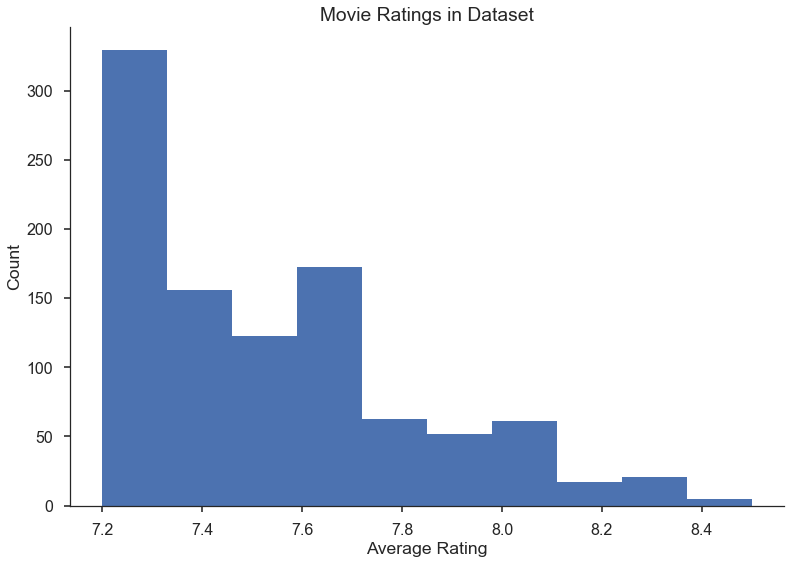

In [102]:
plt.hist(movies.vote_average)
plt.title('Movie Ratings in Dataset')
plt.xlabel('Average Rating')
plt.ylabel('Count')
sns.despine()

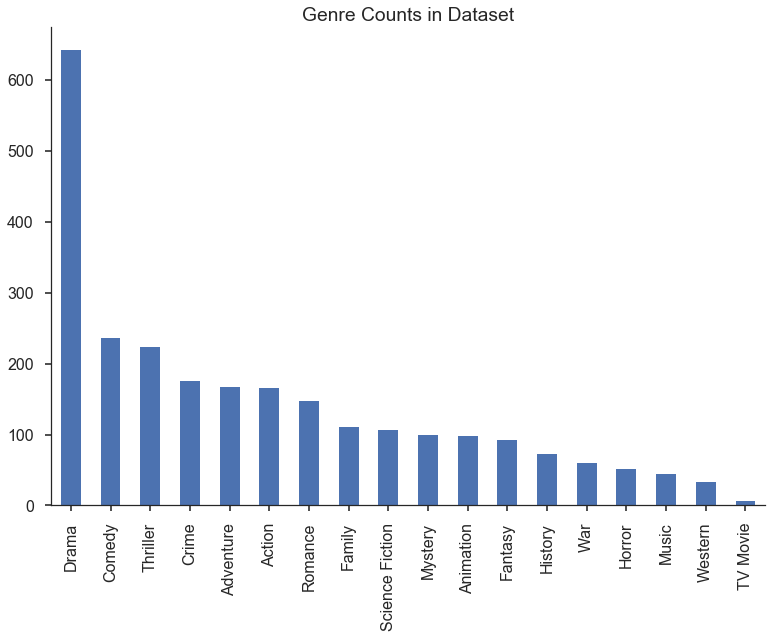

In [127]:
genre_list_ints = []
for sublist in list(movies.genre_ids):
    for item in sublist:
        genre_list_ints.append(item)

genre_list_strings = []
for genre in genre_list:
    genre_list_strings.append(genreDict[genre])
    
genre_counts = Counter(genre_list_strings)
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index')
genre_df.sort_values(by = 0, ascending=False).plot(kind='bar', legend=False)
plt.title('Genre Counts in Dataset')
sns.despine()

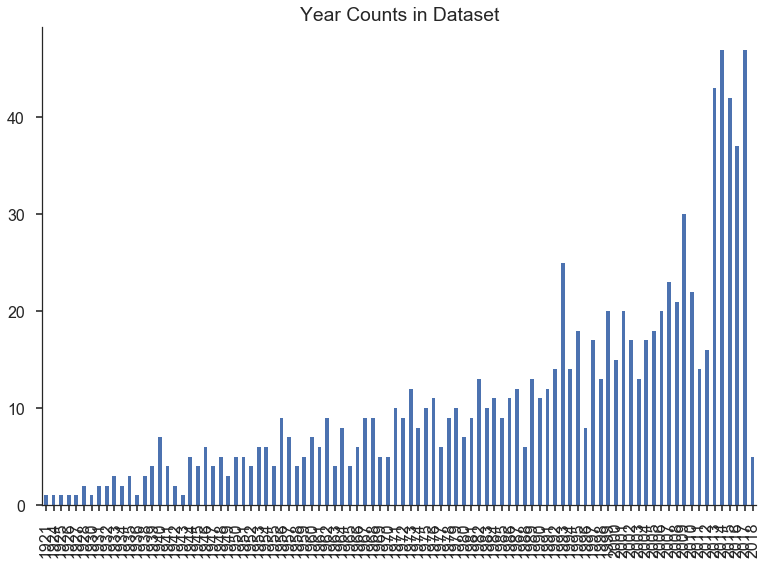

In [137]:
movie_years = [year.year for year in movies.release_date]
year_counts = Counter(movie_years)
year_df = pd.DataFrame.from_dict(year_counts, orient='index')
year_df.sort_index().plot(kind='bar', legend=False)
plt.title('Year Counts in Dataset')
sns.despine()